# Hough transform

In [1]:
import os
import numpy as np
import cv2 # OpenCV-Python
%matplotlib inline
import matplotlib.pyplot as plt
import imageio
from skimage.color import rgb2gray, gray2rgb
import skimage

plt.rcParams['figure.figsize'] = (12, 8)

print("OpenCV-Python Version %s" % cv2.__version__)

OpenCV-Python Version 4.5.1


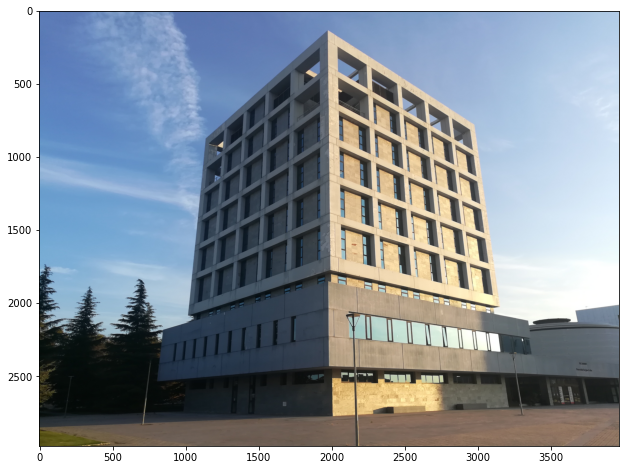

In [2]:
building = np.array(imageio.imread('build_001.jpg'))

plt.imshow(building);

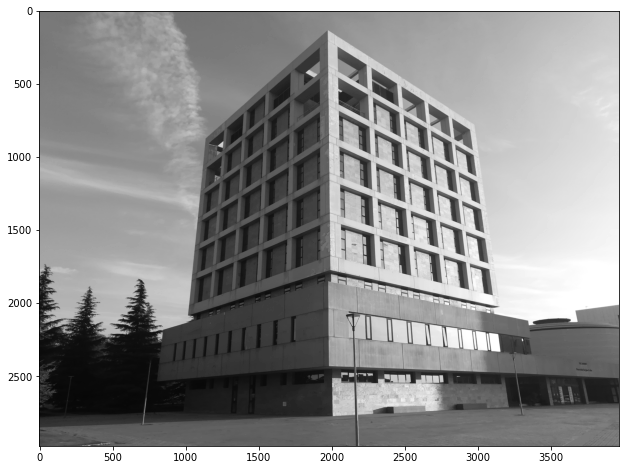

In [3]:
gray_image = rgb2gray(building)

plt.imshow(gray_image, cmap='gray');

In [4]:
cv2.Canny?

Docstring:
Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]]) -> edges
.   @brief Finds edges in an image using the Canny algorithm @cite Canny86 .
.   
.   The function finds edges in the input image and marks them in the output map edges using the
.   Canny algorithm. The smallest value between threshold1 and threshold2 is used for edge linking. The
.   largest value is used to find initial segments of strong edges. See
.   <http://en.wikipedia.org/wiki/Canny_edge_detector>
.   
.   @param image 8-bit input image.
.   @param edges output edge map; single channels 8-bit image, which has the same size as image .
.   @param threshold1 first threshold for the hysteresis procedure.
.   @param threshold2 second threshold for the hysteresis procedure.
.   @param apertureSize aperture size for the Sobel operator.
.   @param L2gradient a flag, indicating whether a more accurate \f$L_2\f$ norm
.   \f$=\sqrt{(dI/dx)^2 + (dI/dy)^2}\f$ should be used to calculate the imag

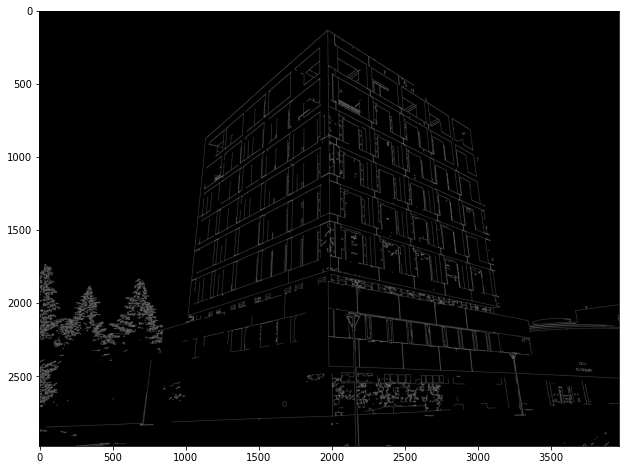

In [5]:
img = skimage.img_as_ubyte(gray_image)
edges = cv2.Canny(img, 50, 200, None, 3)

plt.imshow(edges, cmap='gray');

In [6]:
cv2.HoughLines?

Docstring:
HoughLines(image, rho, theta, threshold[, lines[, srn[, stn[, min_theta[, max_theta]]]]]) -> lines
.   @brief Finds lines in a binary image using the standard Hough transform.
.   
.   The function implements the standard or standard multi-scale Hough transform algorithm for line
.   detection. See <http://homepages.inf.ed.ac.uk/rbf/HIPR2/hough.htm> for a good explanation of Hough
.   transform.
.   
.   @param image 8-bit, single-channel binary source image. The image may be modified by the function.
.   @param lines Output vector of lines. Each line is represented by a 2 or 3 element vector
.   \f$(\rho, \theta)\f$ or \f$(\rho, \theta, \textrm{votes})\f$ . \f$\rho\f$ is the distance from the coordinate origin \f$(0,0)\f$ (top-left corner of
.   the image). \f$\theta\f$ is the line rotation angle in radians (
.   \f$0 \sim \textrm{vertical line}, \pi/2 \sim \textrm{horizontal line}\f$ ).
.   \f$\textrm{votes}\f$ is the value of accumulator.
.   @param rho Distance resolutio

In [7]:
lines = cv2.HoughLines(edges, 1, np.pi / 180, 400, None, 0, 0)

lines.shape

(33, 1, 2)

## Polar coordinates

ρ = x cos θ + y sin θ

where:

ρ (rho) = distance from origin to the line. [-max_dist to max_dist].
          max_dist is the diagonal length of the image.  
θ = angle from origin to the line. [-90° to 90°]

lines 31


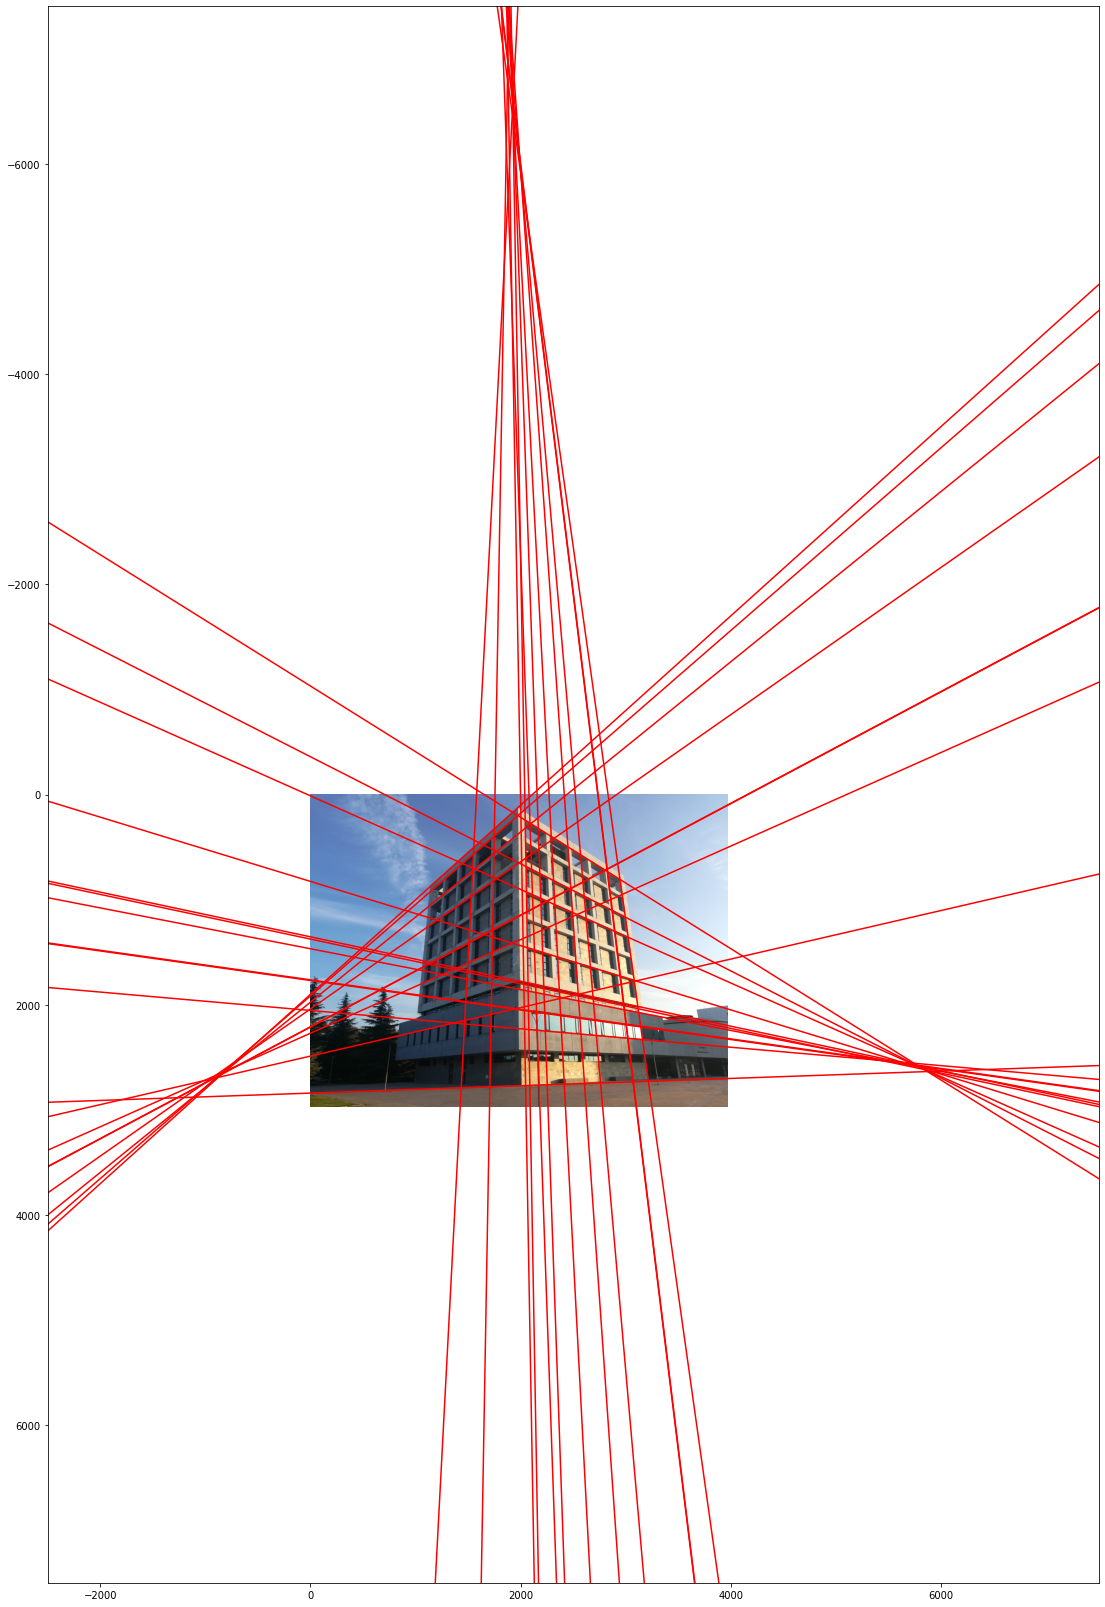

In [8]:
def compute_line_parameters(point1, point2):
    # ax + by = c
    # m = -a/b   n = c/b
    a = point2[1] - point1[1]
    b = point1[0] - point2[0]
    c = a*(point1[0]) + b*(point1[1])
    if a != 0 and b != 0:
        return [-a/b, c/b]


plotted_lines = []

for i in range(lines.shape[0]):
    rho = lines[i, 0, 0]
    theta = lines[i, 0, 1]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 10000*(-b)), int(y0 + 10000*(a)))
    pt2 = (int(x0 - 10000*(-b)), int(y0 - 10000*(a)))
    
    line = compute_line_parameters(pt1, pt2)
    if line:
        plotted_lines.append(line)
        
print('lines', len(plotted_lines))

plt.figure(figsize=(29,29))
plt.xlim([-2500, 7500])
plt.ylim([7500,-7500])
plt.imshow(building)
for line in plotted_lines:
    f = lambda x: line[0]*x + line[1]
    x = np.linspace(-2500, 7500)
    y = f(x)
    plt.plot(x, y, 'r')
plt.show()

# Probabilistic Hough

In [9]:
cv2.HoughLinesP?

Docstring:
HoughLinesP(image, rho, theta, threshold[, lines[, minLineLength[, maxLineGap]]]) -> lines
.   @brief Finds line segments in a binary image using the probabilistic Hough transform.
.   
.   The function implements the probabilistic Hough transform algorithm for line detection, described
.   in @cite Matas00
.   
.   See the line detection example below:
.   @include snippets/imgproc_HoughLinesP.cpp
.   This is a sample picture the function parameters have been tuned for:
.   
.   ![image](pics/building.jpg)
.   
.   And this is the output of the above program in case of the probabilistic Hough transform:
.   
.   ![image](pics/houghp.png)
.   
.   @param image 8-bit, single-channel binary source image. The image may be modified by the function.
.   @param lines Output vector of lines. Each line is represented by a 4-element vector
.   \f$(x_1, y_1, x_2, y_2)\f$ , where \f$(x_1,y_1)\f$ and \f$(x_2, y_2)\f$ are the ending points of each detected
.   line segment.
.   @param rh

In [10]:
lines_p = cv2.HoughLinesP(edges, 1, np.pi / 180, 400)

lines_p.shape

(446, 1, 4)

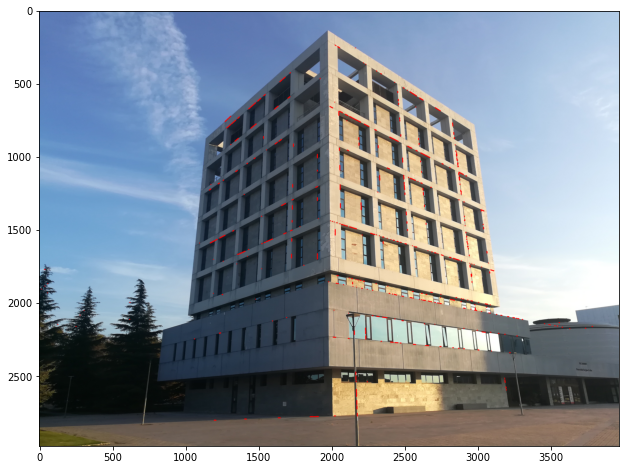

In [11]:
building_copy = np.copy(building)

for i in range(lines_p.shape[0]):
    pt1 = (lines_p[i, 0, 0], lines_p[i, 0, 1])
    pt2 = (lines_p[i, 0, 2], lines_p[i, 0, 3])
    
    cv2.line(building_copy, pt1, pt2, (255,0,0), 5)

plt.imshow(building_copy)
plt.show()

lines 176


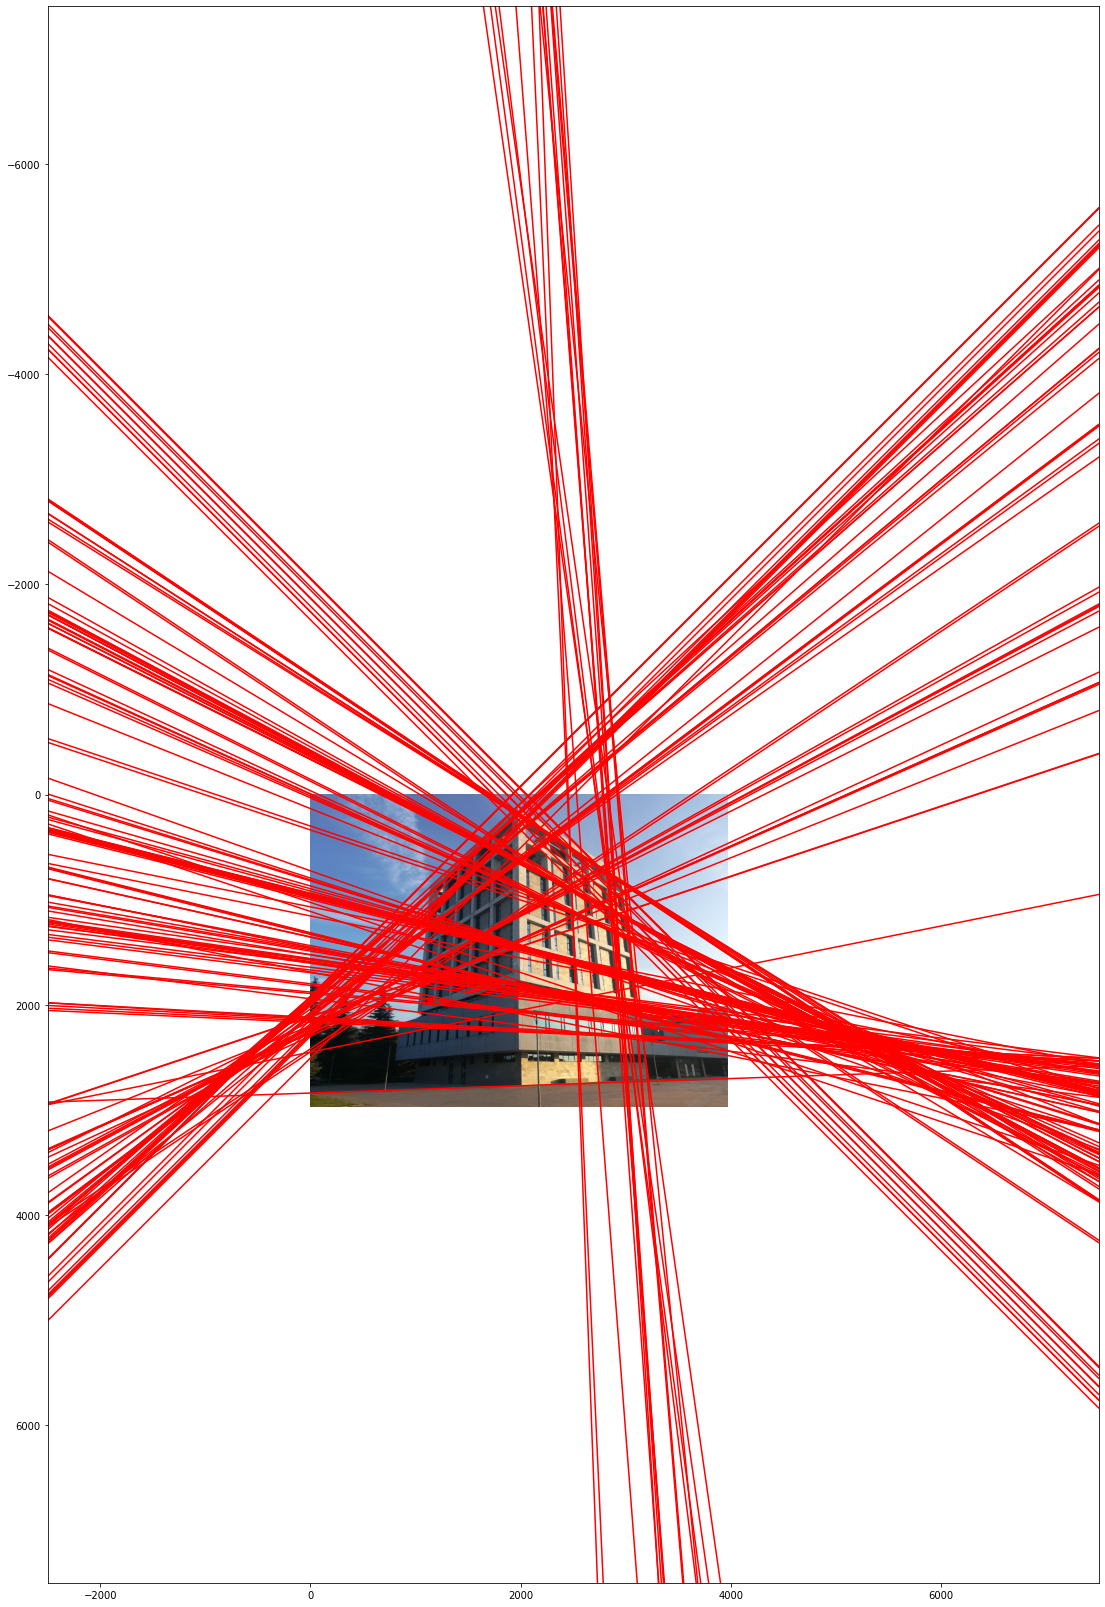

In [12]:
def compute_line_parameters(point1, point2):
    # ax + by = c
    # m = -a/b   n = c/b
    a = point2[1] - point1[1]
    b = point1[0] - point2[0]
    c = a*(point1[0]) + b*(point1[1])
    if a != 0 and b != 0:
        return [-a/b, c/b]


plotted_lines = []

for i in range(lines_p.shape[0]):
    pt1 = (lines_p[i, 0, 0], lines_p[i, 0, 1])
    pt2 = (lines_p[i, 0, 2], lines_p[i, 0, 3])
    
    line = compute_line_parameters(pt1, pt2)
    if line:
        plotted_lines.append(line)
        
print('lines', len(plotted_lines))

plt.figure(figsize=(29,29))
plt.xlim([-2500, 7500])
plt.ylim([7500,-7500])
plt.imshow(building)
for line in plotted_lines:
    f = lambda x: line[0]*x + line[1]
    x = np.linspace(-2500, 7500)
    y = f(x)
    plt.plot(x, y, 'r')
plt.show()

# Detect Cyrcle

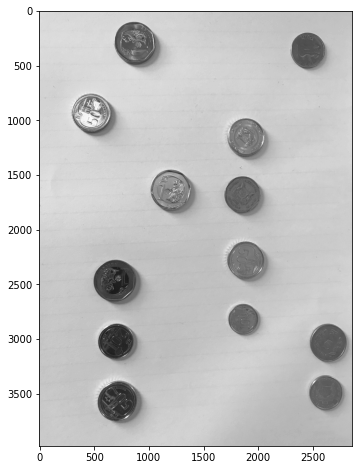

In [13]:
coin_colored = np.array(imageio.imread('coin.jpg'))

coin = rgb2gray(coin_colored)

plt.imshow(coin, cmap='gray');

In [14]:
#Parameters like minDist, minRadius, maxRadius can vary from image to image
img = skimage.img_as_ubyte(coin)
circles_float = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 0.9, minDist=120, param1=50, param2=30, minRadius=90, maxRadius=220)
circles = np.uint16(np.around(circles_float))
print(circles.shape)

(1, 138, 3)


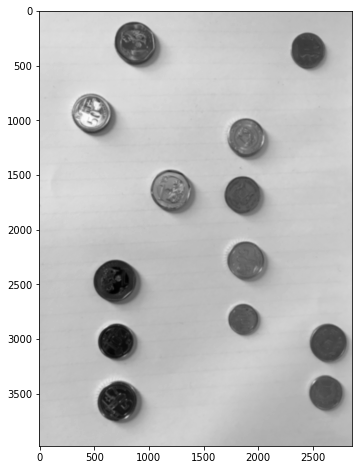

In [15]:
coin_blur = cv2.GaussianBlur(coin, (31, 31), 5)

plt.imshow(coin_blur, cmap='gray');

In [16]:
img = skimage.img_as_ubyte(coin_blur)
circles_float = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 0.9, minDist=120, param1=50, param2=30, minRadius=90, maxRadius=220)
circles = np.uint16(np.around(circles_float))
print(circles.shape)

(1, 13, 3)


In [17]:
circles

array([[[ 868,  282,  184],
        [ 476,  928,  173],
        [1200, 1634,  183],
        [ 682, 2470,  183],
        [1888, 1148,  167],
        [ 696, 3026,  155],
        [ 728, 3572,  195],
        [1858, 1670,  159],
        [2450,  358,  160],
        [2644, 3030,  175],
        [1870, 2818,  142],
        [1888, 2280,  169],
        [2628, 3488,  162]]], dtype=uint16)

In [18]:
cv2.HoughCircles?

Docstring:
HoughCircles(image, method, dp, minDist[, circles[, param1[, param2[, minRadius[, maxRadius]]]]]) -> circles
.   @brief Finds circles in a grayscale image using the Hough transform.
.   
.   The function finds circles in a grayscale image using a modification of the Hough transform.
.   
.   Example: :
.   @include snippets/imgproc_HoughLinesCircles.cpp
.   
.   @note Usually the function detects the centers of circles well. However, it may fail to find correct
.   radii. You can assist to the function by specifying the radius range ( minRadius and maxRadius ) if
.   you know it. Or, in the case of #HOUGH_GRADIENT method you may set maxRadius to a negative number
.   to return centers only without radius search, and find the correct radius using an additional procedure.
.   
.   It also helps to smooth image a bit unless it's already soft. For example,
.   GaussianBlur() with 7x7 kernel and 1.5x1.5 sigma or similar blurring may help.
.   
.   @param image 8-bit, single-chann

In [19]:
# sort by x-coord
circles = np.squeeze(circles)
circles = circles[ circles[:,0].argsort()]
print(circles)
print(circles.shape)

[[ 476  928  173]
 [ 682 2470  183]
 [ 696 3026  155]
 [ 728 3572  195]
 [ 868  282  184]
 [1200 1634  183]
 [1858 1670  159]
 [1870 2818  142]
 [1888 1148  167]
 [1888 2280  169]
 [2450  358  160]
 [2628 3488  162]
 [2644 3030  175]]
(13, 3)


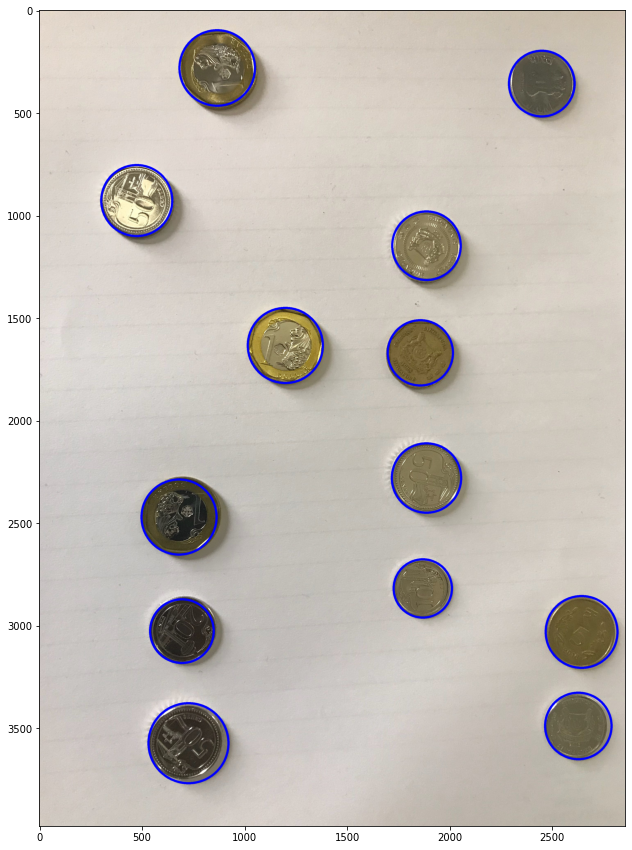

In [20]:
img_coin = np.copy(coin_colored)

for i in range(circles.shape[0]):
    c = (circles[i, 0], circles[i, 1])
    r = circles[i, 2]
    cv2.circle(img_coin, c, r, (0,0, 255), 10)
    
plt.rcParams["figure.figsize"] = (25,15)    
plt.imshow(img_coin);